Vamos a aplicar un análisis similar al ejercicio del Oxide usando los datos del censo 2000 y enfocándonos en las variables relacionadas con los salarios mínimos, debemos adaptar la metodologia al contexto de los datos disponibles. El objetivo será identificar qué variables influyen más en los salarios mínimos.

### tratamiento de datos

In [79]:
#cargar librerias
library(tidyverse)
library(sf)
library(ggplot2)

#cargar datos
data2k <- read.csv("DATA/censo-2000_Nacional_cleaned.csv")

head(data2k, 10)


#omitir filas con NA
data2k <- na.omit(data2k)

,ENTIDAD,NOM_ENT,MUN,NOM_MUN,LOC,NOM_LOC,P_TOTAL,POB0_4,POB18_,PNACOENT,⋯,P1_2SM,P2_5SM,P6_10SM,P10_SM,T_VIVHAB,VIVPARHAB,PRO_OCVP,PRO_OVP,VP_TV,TOTHOG
,<int>,<chr>,<int>,<chr>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,Aguascalientes,1,Aguascalientes,96,AGUA AZUL,79,11,46,12,⋯,10,4,0,1,15,15,2.32,5.27,13,15
2,1,Aguascalientes,1,Aguascalientes,106,ARELLANO,1059,160,530,226,⋯,144,161,6,4,201,201,2.09,5.27,191,212
3,1,Aguascalientes,1,Aguascalientes,112,BAJIO LOS VAZQUEZ,69,3,44,5,⋯,16,4,0,1,12,12,1.86,5.75,12,12
4,1,Aguascalientes,1,Aguascalientes,120,BUENAVISTA DE PEÑUELAS,588,74,326,57,⋯,102,79,3,1,116,116,1.76,5.07,113,121
5,1,Aguascalientes,1,Aguascalientes,121,CABECITA 3 MARIAS (RANCHO NUEVO),177,17,100,15,⋯,22,15,0,1,35,35,1.72,5.06,34,35
6,1,Aguascalientes,1,Aguascalientes,125,CAÑADA GRANDE DE COTORINA,264,49,121,15,⋯,23,22,2,0,53,53,2.37,4.98,41,55
7,1,Aguascalientes,1,Aguascalientes,126,ESTACION CAÑADA HONDA,383,50,229,38,⋯,28,61,6,1,79,79,1.59,4.85,75,88
8,1,Aguascalientes,1,Aguascalientes,138,CENTRO DE ARRIBA (EL TARAY),947,119,488,200,⋯,91,55,4,3,207,207,1.55,4.57,199,210
9,1,Aguascalientes,1,Aguascalientes,139,CIENEGUILLA (LA LUMBRERA),873,112,435,67,⋯,94,45,4,0,195,195,1.62,4.48,187,195


# 1. Identificación de Variables

<b>Variables dependientes (salarios mínimos):</b>
* P_1SM (Población ocupada que recibe menos de un salario mínimo mensual de ingreso por trabajo)
* P1_2SM (Población ocupada que recibe 1 y hasta 2 salarios mínimos mensuales de ingreso por trabajo)
* P2_5SM (Población ocupada que recibe 2 y hasta 5 salarios mínimos mensuales de ingreso por trabajo)
* P6_10SM (Población ocupada que recibe 6 y hasta 10 salarios mínimos mensuales de ingreso por trabajo)
* P10_SM (Población ocupada con más de 10 salarios mínimos mensuales de ingreso por trabajo)



<b>Variables independientes (potenciales influencias):</b>
* P_TOTAL (Población total)
* POB0_4 (Población de 0 a 4 años)
* POB18_ (Población mayor de 18 años)
* PNACOENT (Población nacida en otra entidad)
* GRADOESCO (Grado promedio de escolaridad)
* PCASADA12_ (Poblacion casada mayores de 12 años)
* T_VIVHAB (Total de viviendas habitadas)
* VIVPARHAB (Viviendas particulares habitadas)
* PRO_OCVP (Promedio de ocupantes por vivienda particular habitada)
* PRO_OVP (Promedio de ocupantes por vivienda)
* VP_TV (Viviendas particulares habitadas con TV)
* TOTHOG (Total de hogares)

# 2. Modelo Lineal Mixto

### Factores Aleatorios y Fijos:

* <b>Factores Fijos:</b> Variables que esperamos que influyan sistemáticamente en los salarios mínimos: P_TOTAL, POB0_4, POB18_, PNACOENT, GRADOESCO, PCASADA12_, T_VIVHAB, VIVPARHAB, PRO_OCVP, PRO_OVP, VP_TV, TOTHOG.


* <b>Factores Aleatorios:</b> Variables que representan heterogeneidad no explicada, como la localidad (suponiendo que cada fila corresponde a una localidad).
ENTIDAD, MUN, LOC como niveles de agrupamiento posibles que representan variabilidad no explicada entre estas categorías.

### (b) Modelo Propuesto:

In [80]:
library(nlme)

#modelando personas con 1 salario minimo
model <- lme(P_1SM ~ P_TOTAL + POB0_4 + POB18_ + PNACOENT + GRADOESCO + 
             PCASADA12_ + T_VIVHAB + VIVPARHAB + PRO_OCVP + PRO_OVP + 
             VP_TV + TOTHOG, 
             random = ~ 1 | ENTIDAD/MUN/LOC, data = data2k)

summary(model)

Linear mixed-effects model fit by REML
  Data: data2k 
       AIC      BIC    logLik
  86074.94 86194.11 -43020.47

Random effects:
 Formula: ~1 | ENTIDAD
        (Intercept)
StdDev:    4.388351

 Formula: ~1 | MUN %in% ENTIDAD
        (Intercept)
StdDev:    8.885864

 Formula: ~1 | LOC %in% MUN %in% ENTIDAD
        (Intercept) Residual
StdDev:    42.54338 16.08513

Fixed effects:  P_1SM ~ P_TOTAL + POB0_4 + POB18_ + PNACOENT + GRADOESCO + PCASADA12_ +      T_VIVHAB + VIVPARHAB + PRO_OCVP + PRO_OVP + VP_TV + TOTHOG 
                Value Std.Error   DF   t-value p-value
(Intercept) -5.362631  3.497574 8033  -1.53324  0.1253
P_TOTAL      0.408600  0.009643 8033  42.37372  0.0000
POB0_4      -1.312213  0.028025 8033 -46.82230  0.0000
POB18_      -0.559552  0.015709 8033 -35.61969  0.0000
PNACOENT    -0.076409  0.002229 8033 -34.27729  0.0000
GRADOESCO    0.247493  0.324532 8033   0.76261  0.4457
PCASADA12_   0.141220  0.016899 8033   8.35674  0.0000
T_VIVHAB    -1.631986  0.069746 8033 -

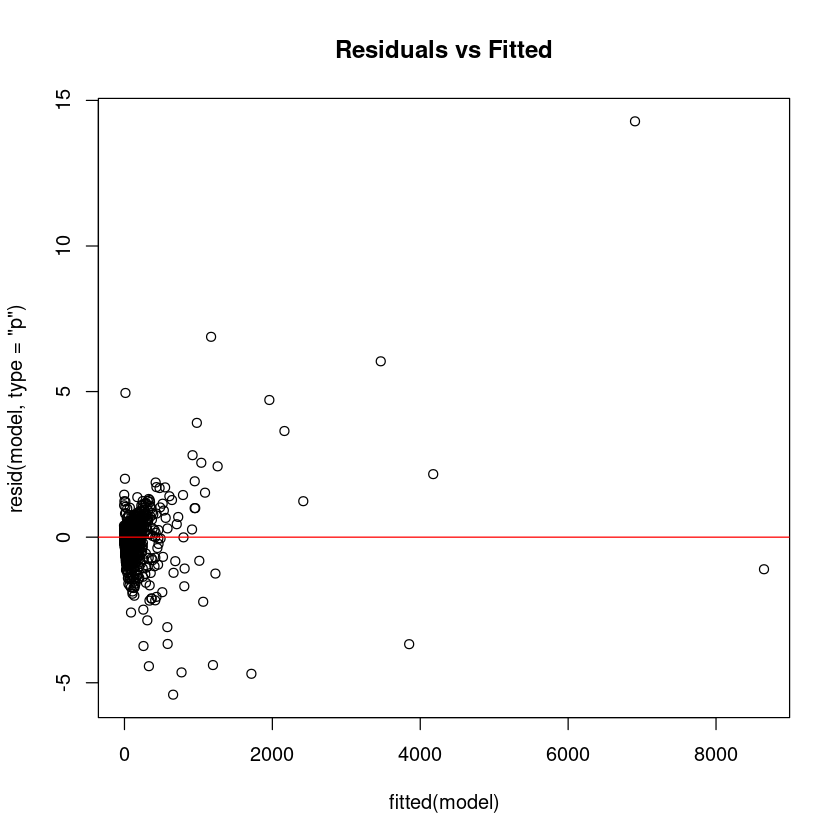

In [81]:
#residuals vs fitted values
plot(resid(model, type = "p") ~ fitted(model), main = "Residuals vs Fitted")

#linea horizontal en 0
abline(h = 0, col = "red")

In [82]:
#residuales
resid_values <- resid(model)

outliers <- which(abs(resid_values) > 3)

#quitamos outliers
df_clean <- data2k[-outliers, ]

#actualizamos modelo
model_clean <- update(model, data = df_clean)

summary(model_clean)

Linear mixed-effects model fit by REML
  Data: df_clean 
       AIC      BIC    logLik
  49555.48 49671.87 -24760.74

Random effects:
 Formula: ~1 | ENTIDAD
        (Intercept)
StdDev:    1.748991

 Formula: ~1 | MUN %in% ENTIDAD
        (Intercept)
StdDev:    4.285335

 Formula: ~1 | LOC %in% MUN %in% ENTIDAD
        (Intercept) Residual
StdDev:    7.680092 2.992883

Fixed effects:  P_1SM ~ P_TOTAL + POB0_4 + POB18_ + PNACOENT + GRADOESCO + PCASADA12_ +      T_VIVHAB + VIVPARHAB + PRO_OCVP + PRO_OVP + VP_TV + TOTHOG 
                 Value Std.Error   DF   t-value p-value
(Intercept) -2.9401394 1.0031390 6799  -2.93094  0.0034
P_TOTAL      0.2592696 0.0069334 6799  37.39451  0.0000
POB0_4      -0.9318322 0.0183656 6799 -50.73800  0.0000
POB18_      -0.3070678 0.0134885 6799 -22.76523  0.0000
PNACOENT    -0.0702597 0.0022974 6799 -30.58223  0.0000
GRADOESCO    0.1880286 0.0626608 6799   3.00074  0.0027
PCASADA12_   0.1117335 0.0136197 6799   8.20381  0.0000
T_VIVHAB    -1.1269501 0.032

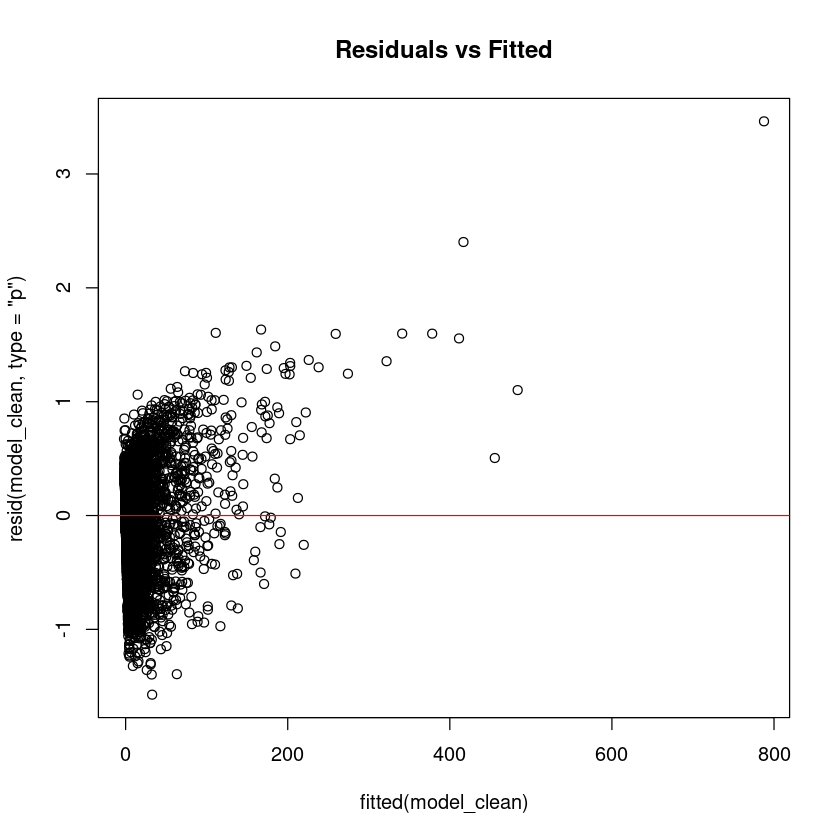

In [83]:
#residuals vs fitted values
plot(resid(model_clean, type = "p") ~ fitted(model_clean), main = "Residuals vs Fitted")

#linea horizontal en 0
abline(h = 0, col = "red")

## Ajuste del modelo mixto considerando LOC como efecto aleatorio:

In [84]:
model_loc_random <- update(model, random = ~ 1 | LOC)
summary(model_loc_random)

Linear mixed-effects model fit by REML
  Data: data2k 
       AIC      BIC    logLik
  86183.06 86288.21 -43076.53

Random effects:
 Formula: ~1 | LOC
        (Intercept) Residual
StdDev: 0.005265198 46.18899

Fixed effects:  P_1SM ~ P_TOTAL + POB0_4 + POB18_ + PNACOENT + GRADOESCO + PCASADA12_ +      T_VIVHAB + VIVPARHAB + PRO_OCVP + PRO_OVP + VP_TV + TOTHOG 
                 Value Std.Error   DF   t-value p-value
(Intercept) -1.1189375 2.7555960 6013  -0.40606  0.6847
P_TOTAL      0.4064672 0.0095427 6013  42.59464  0.0000
POB0_4      -1.3085594 0.0276311 6013 -47.35822  0.0000
POB18_      -0.5490161 0.0154621 6013 -35.50718  0.0000
PNACOENT    -0.0755094 0.0022090 6013 -34.18207  0.0000
GRADOESCO    0.3679323 0.2896343 6013   1.27033  0.2040
PCASADA12_   0.1399559 0.0167055 6013   8.37782  0.0000
T_VIVHAB    -1.5928473 0.0687249 6013 -23.17714  0.0000
VIVPARHAB   -0.4489647 0.1086101 6013  -4.13373  0.0000
PRO_OCVP     0.2722109 0.5890552 6013   0.46211  0.6440
PRO_OVP     -1.758324

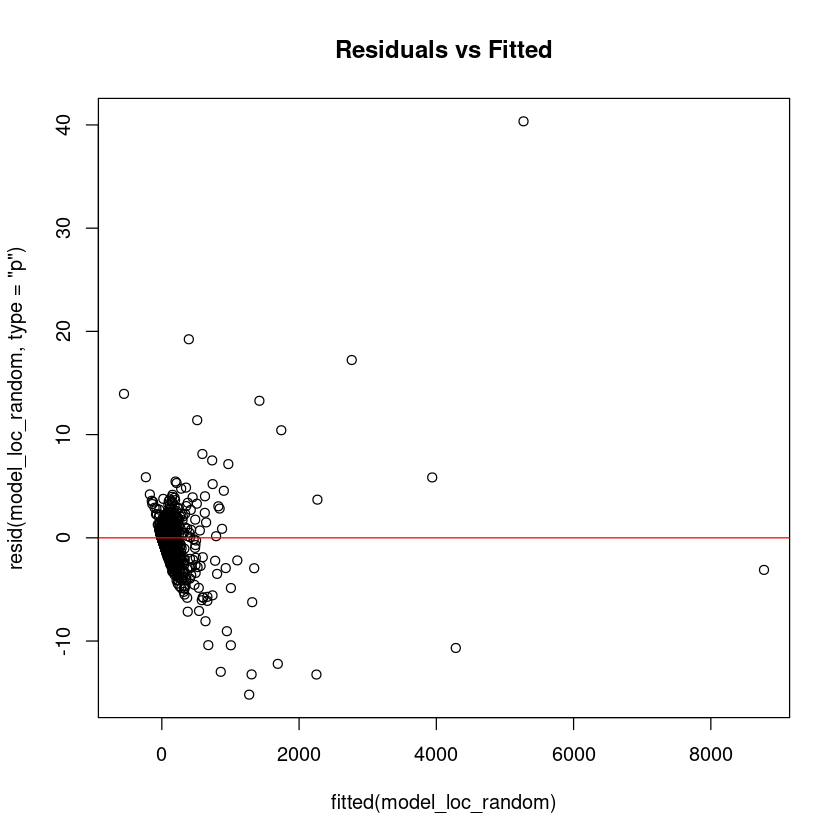

In [85]:
plot(resid(model_loc_random , type = "p") ~ fitted(model_loc_random ), main = "Residuals vs Fitted")
abline(h = 0, col = "red")

limpiamos

In [86]:
#residuales
resid_values <- resid(model_loc_random )

outliers <- which(abs(resid_values) > 3)

#quitamos outliers
df_clean <- data2k[-outliers, ]

#actualizamos modelo
model_clean_loc_random <- update(model_loc_random , data = df_clean)

summary(model_clean_loc_random)

Linear mixed-effects model fit by REML
  Data: df_clean 
      AIC      BIC    logLik
  5798.65 5878.117 -2884.325

Random effects:
 Formula: ~1 | LOC
        (Intercept) Residual
StdDev:   0.2586817 1.607111

Fixed effects:  P_1SM ~ P_TOTAL + POB0_4 + POB18_ + PNACOENT + GRADOESCO + PCASADA12_ +      T_VIVHAB + VIVPARHAB + PRO_OCVP + PRO_OVP + VP_TV + TOTHOG 
                 Value  Std.Error  DF    t-value p-value
(Intercept)  0.0489308 0.19201601 877    0.25483  0.7989
P_TOTAL      0.3991729 0.00359973 600  110.88958  0.0000
POB0_4      -1.2705009 0.01001914 600 -126.80736  0.0000
POB18_      -0.5340744 0.00651451 600  -81.98231  0.0000
PNACOENT    -0.0721759 0.00125010 600  -57.73628  0.0000
GRADOESCO    0.3339040 0.01829114 600   18.25496  0.0000
PCASADA12_   0.1333717 0.00750046 600   17.78180  0.0000
T_VIVHAB    -1.5778981 0.01802551 600  -87.53695  0.0000
VIVPARHAB   -0.4728652 0.04059093 600  -11.64953  0.0000
PRO_OCVP     0.1964727 0.05601306 600    3.50762  0.0005
PRO_OVP   

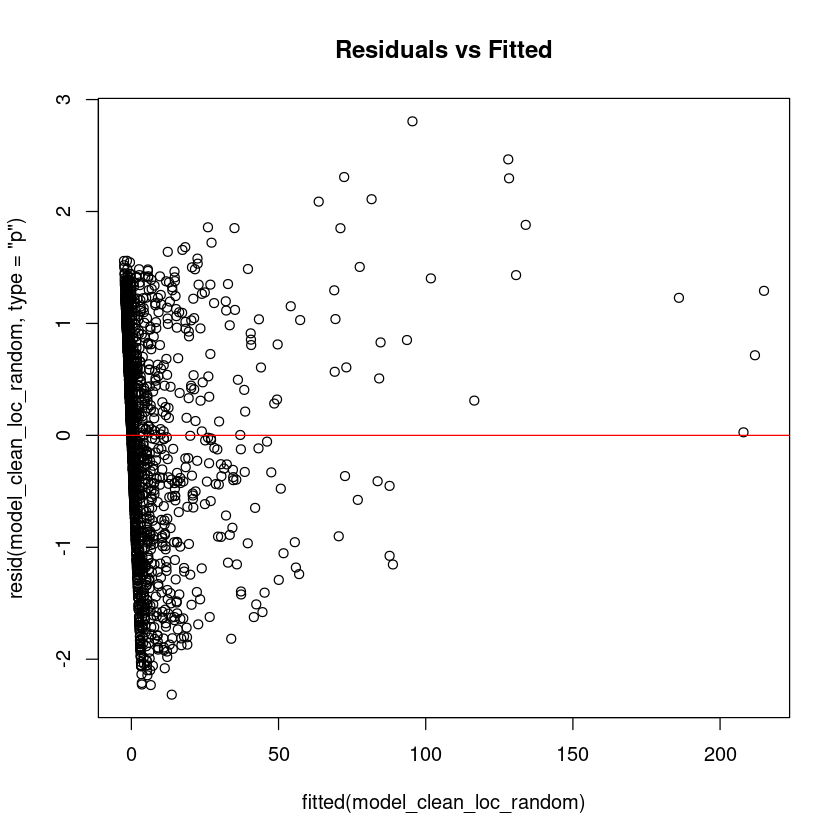

In [89]:
#residuals vs fitted values
plot(resid(model_clean_loc_random, type = "p") ~ fitted(model_clean_loc_random), main = "Residuals vs Fitted")

#linea horizontal en 0
abline(h = 0, col = "red")

## Comparación de modelos usando ANOVA:

In [90]:
anova(model, model_loc_random)

,call,Model,df,AIC,BIC,logLik,Test,L.Ratio,p-value
,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>
model,"lme.formula(fixed = P_1SM ~ P_TOTAL + POB0_4 + POB18_ + PNACOENT + GRADOESCO + PCASADA12_ + T_VIVHAB + VIVPARHAB + PRO_OCVP + PRO_OVP + VP_TV + TOTHOG, data = data2k, random = ~1 | ENTIDAD/MUN/LOC)",1,17,86074.94,86194.11,-43020.47,,NA,NA
model_loc_random,"lme.formula(fixed = P_1SM ~ P_TOTAL + POB0_4 + POB18_ + PNACOENT + GRADOESCO + PCASADA12_ + T_VIVHAB + VIVPARHAB + PRO_OCVP + PRO_OVP + VP_TV + TOTHOG, data = data2k, random = ~1 | LOC)",2,15,86183.06,86288.21,-43076.53,1 vs 2,112.1189,4.505016e-25


# Ajuste del modelo definiendo promedio de salarios minimos

In [91]:
data2k$PROM_SM <- (data2k$P_1SM + data2k$P1_2SM + data2k$P2_5SM + data2k$P6_10SM + data2k$P10_SM) / 5

#quitamos cada columna de salario minimo
data2k <- data2k[, !(names(data2k) %in% c('P_1SM', 'P1_2SM', 'P2_5SM', 'P6_10SM', 'P10_SM'))]

head(data2k, 2)

,ENTIDAD,NOM_ENT,MUN,NOM_MUN,LOC,NOM_LOC,P_TOTAL,POB0_4,POB18_,PNACOENT,GRADOESCO,PCASADA12_,T_VIVHAB,VIVPARHAB,PRO_OCVP,PRO_OVP,VP_TV,TOTHOG,PROM_SM
,<int>,<chr>,<int>,<chr>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,Aguascalientes,1,Aguascalientes,96,AGUA AZUL,79,11,46,12,4,24,15,15,2.32,5.27,13,15,3.2
2,1,Aguascalientes,1,Aguascalientes,106,ARELLANO,1059,160,530,226,6,394,201,201,2.09,5.27,191,212,69.6


In [92]:
library(nlme)

#modelando con promedio de salario minimo
model_prom <- lme(PROM_SM ~ P_TOTAL + POB0_4 + POB18_ + PNACOENT + GRADOESCO + 
             PCASADA12_ + T_VIVHAB + VIVPARHAB + PRO_OCVP + PRO_OVP + 
             VP_TV + TOTHOG, 
             random = ~ 1 | ENTIDAD/MUN/LOC, data = data2k)

summary(model_prom)

Linear mixed-effects model fit by REML
  Data: data2k 
      AIC      BIC    logLik
  64854.1 64973.27 -32410.05

Random effects:
 Formula: ~1 | ENTIDAD
        (Intercept)
StdDev:    1.596564

 Formula: ~1 | MUN %in% ENTIDAD
        (Intercept)
StdDev:     3.81292

 Formula: ~1 | LOC %in% MUN %in% ENTIDAD
        (Intercept) Residual
StdDev:    11.55916 4.418397

Fixed effects:  PROM_SM ~ P_TOTAL + POB0_4 + POB18_ + PNACOENT + GRADOESCO +      PCASADA12_ + T_VIVHAB + VIVPARHAB + PRO_OCVP + PRO_OVP +      VP_TV + TOTHOG 
                 Value Std.Error   DF   t-value p-value
(Intercept) -0.1134588 1.0899977 8033  -0.10409  0.9171
P_TOTAL     -0.0947080 0.0026392 8033 -35.88460  0.0000
POB0_4       0.4562863 0.0076813 8033  59.40207  0.0000
POB18_       0.1766101 0.0043076 8033  41.00004  0.0000
PNACOENT     0.0014056 0.0006099 8033   2.30441  0.0212
GRADOESCO   -0.1910846 0.0895430 8033  -2.13400  0.0329
PCASADA12_  -0.1456282 0.0046320 8033 -31.43974  0.0000
T_VIVHAB     0.5122194 0.

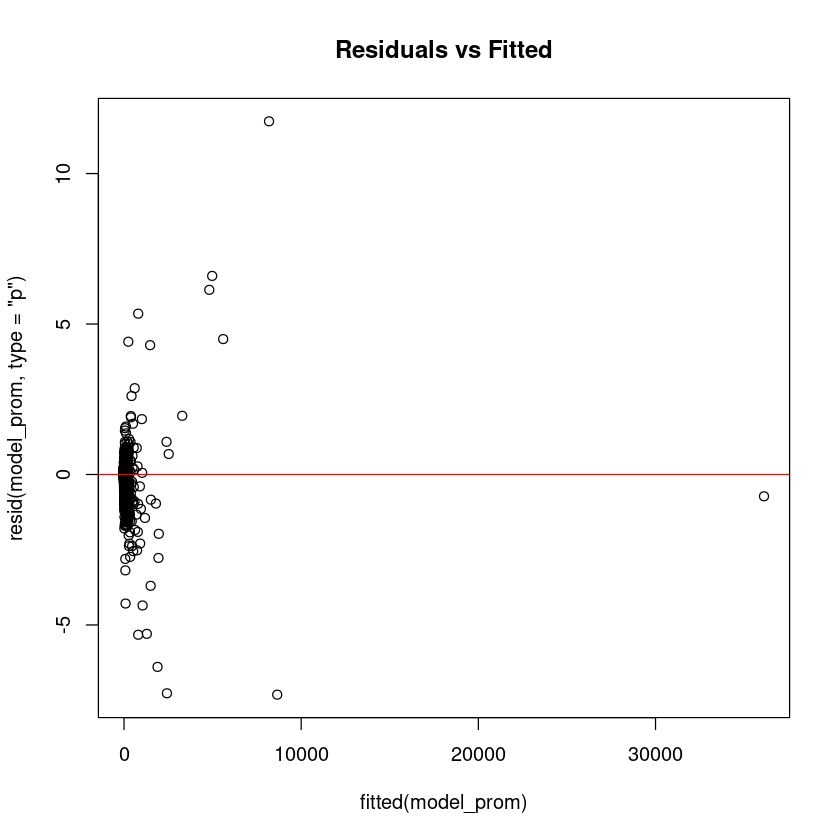

In [93]:
plot(resid(model_prom, type = "p") ~ fitted(model_prom), main = "Residuals vs Fitted")
abline(h = 0, col = "red")

limpiamos

In [94]:
#residuales
resid_values <- resid(model_prom)

outliers <- which(abs(resid_values) > 3)

#quitamos outliers
df_clean <- data2k[-outliers, ]

#actualizamos modelo
model_clean_prom <- update(model_prom , data = df_clean)

summary(model_clean_prom)

Linear mixed-effects model fit by REML
  Data: df_clean 
       AIC   BIC    logLik
  46930.25 47049 -23448.13

Random effects:
 Formula: ~1 | ENTIDAD
        (Intercept)
StdDev:   0.6476266

 Formula: ~1 | MUN %in% ENTIDAD
        (Intercept)
StdDev:    1.817317

 Formula: ~1 | LOC %in% MUN %in% ENTIDAD
        (Intercept) Residual
StdDev:       4.013 1.894645

Fixed effects:  PROM_SM ~ P_TOTAL + POB0_4 + POB18_ + PNACOENT + GRADOESCO +      PCASADA12_ + T_VIVHAB + VIVPARHAB + PRO_OCVP + PRO_OVP +      VP_TV + TOTHOG 
                 Value Std.Error   DF   t-value p-value
(Intercept) -0.5059001 0.4332629 7831  -1.16765  0.2430
P_TOTAL     -0.0569657 0.0023864 7831 -23.87147  0.0000
POB0_4       0.2474229 0.0065106 7831  38.00307  0.0000
POB18_       0.1483322 0.0049018 7831  30.26079  0.0000
PNACOENT     0.0129296 0.0008296 7831  15.58504  0.0000
GRADOESCO   -0.1133130 0.0326450 7831  -3.47106  0.0005
PCASADA12_  -0.0952115 0.0044157 7831 -21.56223  0.0000
T_VIVHAB     0.2745960 0.01

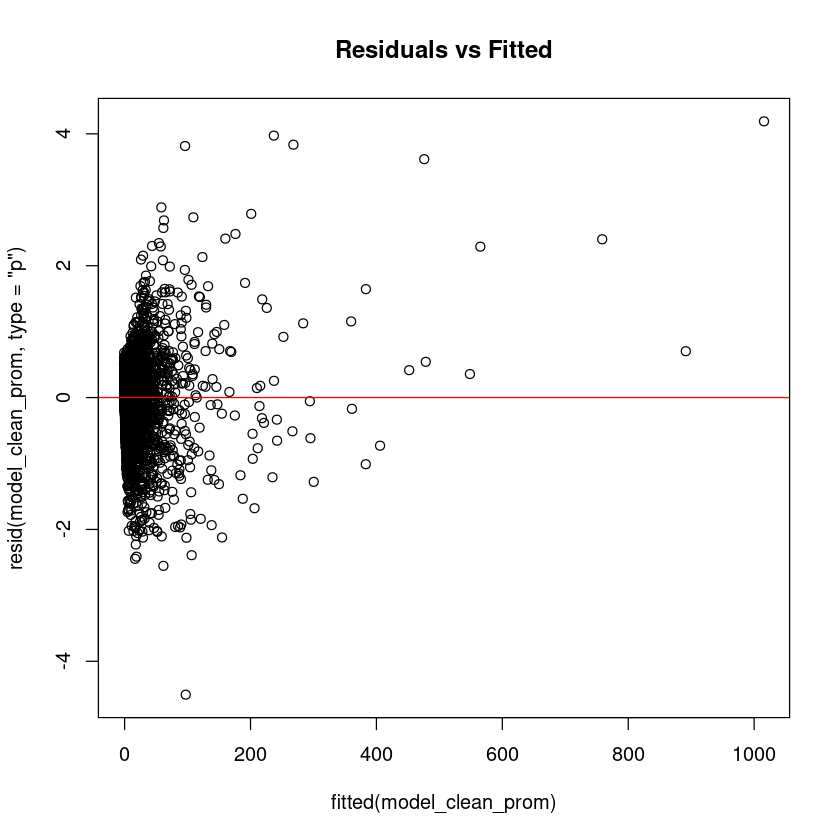

In [95]:
# Plot residuals against fitted values
plot(resid(model_clean_prom, type = "p") ~ fitted(model_clean_prom), main = "Residuals vs Fitted")

# Add a horizontal line at y = 0
abline(h = 0, col = "red")

## Comparación de modelos usando ANOVA:

In [77]:
anova(model, model_prom)

Warning message in anova.lme(model, model_prom):
“some fitted objects deleted because response differs from the first model”


ERROR: Error in anova.lme(model, model_prom): first model has a different response from the rest
